In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("basket_analysis.csv")
data.head()

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
data = data.drop(['Unnamed: 0'],axis = 1)
data.head()

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
data.describe()

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
count,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999,999
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,616,615,579,595,592,601,615,589,591,594,598,596,590,610,579,578


In [5]:
nullity = data.isnull().sum()
nullity

Apple           0
Bread           0
Butter          0
Cheese          0
Corn            0
Dill            0
Eggs            0
Ice cream       0
Kidney Beans    0
Milk            0
Nutmeg          0
Onion           0
Sugar           0
Unicorn         0
Yogurt          0
chocolate       0
dtype: int64

In [6]:
frequent_itemsets = apriori(data, min_support = 0.006, max_len = 3, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.383383,(Apple)
1,0.384384,(Bread)
2,0.420420,(Butter)
3,0.404404,(Cheese)
4,0.407407,(Corn)
...,...,...
691,0.098098,"(Yogurt, Onion, chocolate)"
692,0.087087,"(Yogurt, Unicorn, Sugar)"
693,0.090090,"(chocolate, Unicorn, Sugar)"
694,0.095095,"(Yogurt, chocolate, Sugar)"


In [7]:
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bread),(Apple),0.384384,0.383383,0.154154,0.401042,1.046059,0.006788,1.029482
1,(Apple),(Bread),0.383383,0.384384,0.154154,0.402089,1.046059,0.006788,1.029610
2,(Butter),(Apple),0.420420,0.383383,0.188188,0.447619,1.167549,0.027006,1.116289
3,(Apple),(Butter),0.383383,0.420420,0.188188,0.490862,1.167549,0.027006,1.138354
4,(Cheese),(Apple),0.404404,0.383383,0.162162,0.400990,1.045925,0.007120,1.029393
...,...,...,...,...,...,...,...,...,...
433,"(Yogurt, chocolate)",(Milk),0.198198,0.405405,0.104104,0.525253,1.295623,0.023753,1.252444
434,"(Milk, chocolate)",(Yogurt),0.211211,0.420420,0.104104,0.492891,1.172376,0.015307,1.142909
435,(Yogurt),"(Milk, chocolate)",0.420420,0.211211,0.104104,0.247619,1.172376,0.015307,1.048390
436,(Milk),"(Yogurt, chocolate)",0.405405,0.198198,0.104104,0.256790,1.295623,0.023753,1.078836


In [8]:
filtered_rules = rules[(rules['antecedent support'] > 0.02) &
                      (rules['consequent support'] > 0.01) &
                       (rules['confidence'] > 0.2) &
                       (rules['lift'] > 1.0)
                      ]
filtered_rules    

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bread),(Apple),0.384384,0.383383,0.154154,0.401042,1.046059,0.006788,1.029482
1,(Apple),(Bread),0.383383,0.384384,0.154154,0.402089,1.046059,0.006788,1.029610
2,(Butter),(Apple),0.420420,0.383383,0.188188,0.447619,1.167549,0.027006,1.116289
3,(Apple),(Butter),0.383383,0.420420,0.188188,0.490862,1.167549,0.027006,1.138354
4,(Cheese),(Apple),0.404404,0.383383,0.162162,0.400990,1.045925,0.007120,1.029393
...,...,...,...,...,...,...,...,...,...
433,"(Yogurt, chocolate)",(Milk),0.198198,0.405405,0.104104,0.525253,1.295623,0.023753,1.252444
434,"(Milk, chocolate)",(Yogurt),0.211211,0.420420,0.104104,0.492891,1.172376,0.015307,1.142909
435,(Yogurt),"(Milk, chocolate)",0.420420,0.211211,0.104104,0.247619,1.172376,0.015307,1.048390
436,(Milk),"(Yogurt, chocolate)",0.405405,0.198198,0.104104,0.256790,1.295623,0.023753,1.078836


In [9]:
filtered_rules = filtered_rules.sort_values('confidence', ascending = False)
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
402,"(Unicorn, Dill)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764
390,"(Milk, Dill)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446
326,"(Cheese, Dill)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968
392,"(Dill, chocolate)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051
260,"(Kidney Beans, Ice cream)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902
...,...,...,...,...,...,...,...,...,...
322,(Butter),"(Nutmeg, Yogurt)",0.420420,0.192192,0.100100,0.238095,1.238839,0.019299,1.060248
285,(Butter),"(Unicorn, Ice cream)",0.420420,0.185185,0.100100,0.238095,1.285714,0.022244,1.069444
243,(Butter),"(Apple, Sugar)",0.420420,0.182182,0.100100,0.238095,1.306907,0.023507,1.073386
371,(Yogurt),"(Corn, Kidney Beans)",0.420420,0.195195,0.100100,0.238095,1.219780,0.018036,1.056306


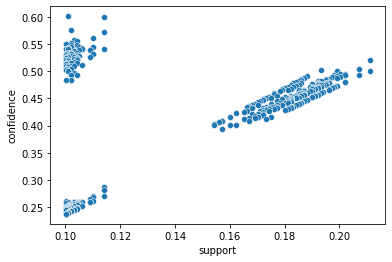

In [10]:
sns.scatterplot(x = 'support', y = 'confidence', data = filtered_rules)
plt.show()

In [11]:
filtered_rules = rules[(rules['antecedent support'] > 0.02) &
                        (rules['consequent support'] > 0.01) &
                       (rules['confidence'] > 0.45) &
                       (rules['lift'] > 1.0)
                      ]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Apple),(Butter),0.383383,0.420420,0.188188,0.490862,1.167549,0.027006,1.138354
6,(Corn),(Apple),0.407407,0.383383,0.186186,0.457002,1.192025,0.029993,1.135579
7,(Apple),(Corn),0.383383,0.407407,0.186186,0.485640,1.192025,0.029993,1.152096
9,(Apple),(Dill),0.383383,0.398398,0.179179,0.467363,1.173104,0.026440,1.129478
15,(Apple),(Kidney Beans),0.383383,0.408408,0.176176,0.459530,1.125173,0.019599,1.094587
...,...,...,...,...,...,...,...,...,...
427,"(Nutmeg, Yogurt)",(Kidney Beans),0.192192,0.408408,0.101101,0.526042,1.288028,0.022608,1.248193
428,"(Kidney Beans, Yogurt)",(Nutmeg),0.194194,0.401401,0.101101,0.520619,1.297002,0.023151,1.248690
432,"(Yogurt, Milk)",(chocolate),0.190190,0.421421,0.104104,0.547368,1.298862,0.023954,1.278255
433,"(Yogurt, chocolate)",(Milk),0.198198,0.405405,0.104104,0.525253,1.295623,0.023753,1.252444


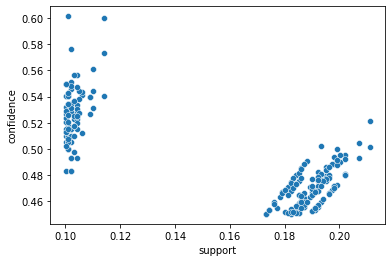

In [12]:
sns.scatterplot(x = 'support', y = 'confidence', data = filtered_rules)
plt.show()

In [13]:
filtered_rules = rules[(rules['antecedent support'] > 0.02) &
                        (rules['consequent support'] > 0.01) &
                       (rules['confidence'] > 0.45) &
                       (rules['lift'] > 1.0) &
                       (rules['support'] > 0.195)
                      ]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571
67,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579
68,(Butter),(Kidney Beans),0.420420,0.408408,0.202202,0.480952,1.177626,0.030499,1.139764
69,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905
70,(Butter),(Milk),0.420420,0.405405,0.198198,0.471429,1.162857,0.027757,1.124909
71,(Milk),(Butter),0.405405,0.420420,0.198198,0.488889,1.162857,0.027757,1.133960
72,(Nutmeg),(Butter),0.401401,0.420420,0.198198,0.493766,1.174457,0.029441,1.144884
73,(Butter),(Nutmeg),0.420420,0.401401,0.198198,0.471429,1.174457,0.029441,1.132484
74,(Butter),(Onion),0.420420,0.403403,0.197197,0.469048,1.162726,0.027598,1.123635
75,(Onion),(Butter),0.403403,0.420420,0.197197,0.488834,1.162726,0.027598,1.133838


In [14]:
from pandas.plotting import parallel_coordinates

In [15]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

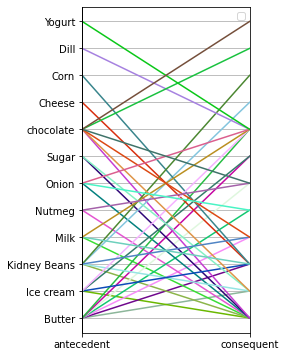

In [16]:
coords = rules_to_coordinates(filtered_rules)
plt.figure(figsize = (3,6))
parallel_coordinates(coords,'rule')
plt.legend([])
plt.show()

In [29]:
filtered_rules['antecedents'] = filtered_rules['antecedents'].apply(lambda x : list(x)[0])
filtered_rules['consequents'] = filtered_rules['consequents'].apply(lambda x : list(x)[0])

In [30]:
support_table = filtered_rules.pivot(index = 'consequents', columns = 'antecedents', values = 'support')

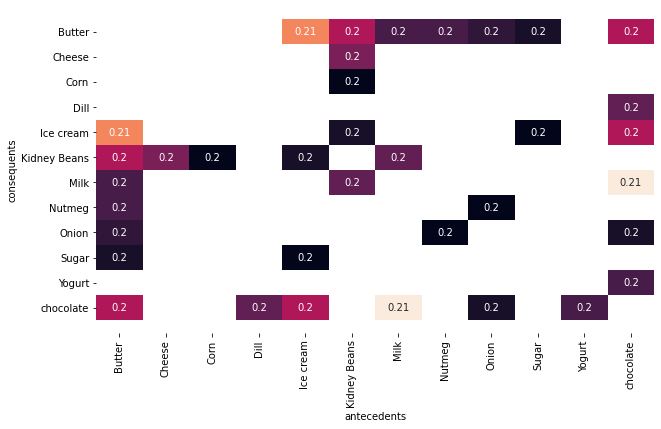

In [31]:
plt.figure(figsize = (10,6))
sns.heatmap(support_table, annot = True, cbar = False)
b,t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b,t)
plt.yticks(rotation = 0)
plt.show()

In [34]:
lift_table = filtered_rules.pivot(index = 'consequents', columns = 'antecedents', values = 'lift')

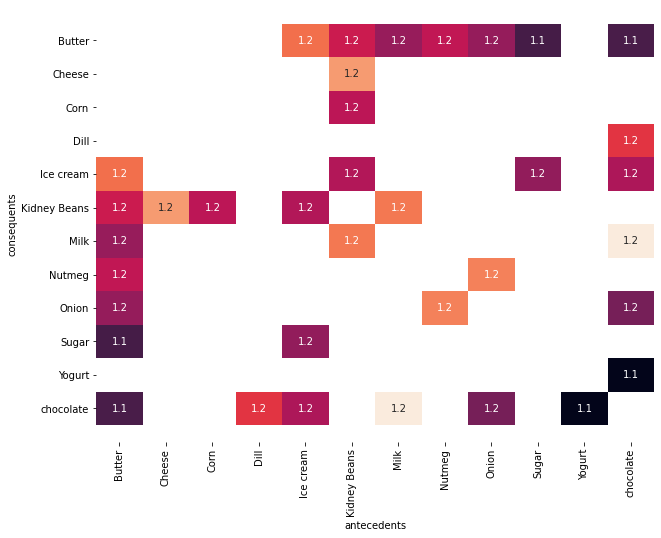

In [37]:
plt.figure(figsize = (10,8))
sns.heatmap(lift_table, annot = True, cbar = False)
b,t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b,t)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [38]:
import plotly.express as px

In [49]:
fig = px.parallel_categories(filtered_rules, dimensions = ['antecedents', 'consequents'])
fig.show()

In [61]:
fig = px.parallel_categories(filtered_rules, dimensions = ['antecedents', 'consequents', 'confidence'],
                             color = 'confidence')
fig.show()

In [62]:
import networkx as nx

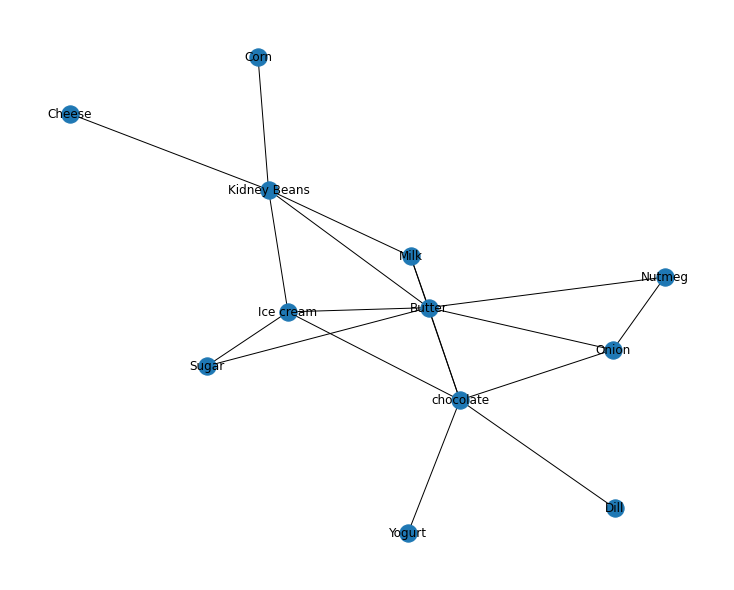

In [70]:
plt.figure(figsize=(10,8))
GA = nx.from_pandas_edgelist(filtered_rules, source = 'antecedents', target = 'consequents')
nx.draw(GA, with_labels = True)
plt.show()